In [0]:
from google.colab import drive
drive.mount('/content/driver')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/driver


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
import warnings
from glob import glob
from sklearn.preprocessing import StandardScaler
from keras.optimizers import Adam
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [0]:

# data = pd.read_csv('/content/driver/My Drive/Deep-Learning/stock3/data_stocks.csv')
path_train = '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k59/datacsv/train_k59/*.csv'
files = glob(path_train)
x_input =[]
y_output=[]
print(files)
for file in files:
  data = pd.read_csv(file)
  data_xt = data['XT'].values
  data_at = data['AT'].values
  data_total_at = data['TOTAL_AT'].values

  # data = []
  # data.append(data_xt)
  # data.append(data_ac)
  # data.append(data_total_ac)

  # data = np.asarray(data)

  # scaler = StandardScaler()

  
  # data = scaler.fit_transform(data)

  # data_xt = data[0]
  # data_ac = data[1]
  # data_total_ac = data[2]

  print(data_total_at)
  # scaler = MinMaxScaler()
  

#dung de lay du lieu theo cap
  data_input2D = []
  data_output1D = []
  steps = 3
  
  for i in range(0,len(data_xt)-steps+1):
    temp_3D = []
    for k in range(i, i+steps):
      temp_2D = []
      temp_2D.append(data_xt[k])
      temp_2D.append(data_at[k])
      
      temp_3D.append(temp_2D)

    data_output1D.append(data_total_at[i])

    data_input2D.append(temp_3D)
  x_input.append(data_input2D)
  y_output.append(data_output1D)

x_input = np.concatenate( x_input, axis=0 )
y_output = np.concatenate( y_output, axis=0 )
x_train = np.asarray(x_input)
y_train = np.asarray(y_output)

x_train = x_train.reshape(-1,3,2)
y_train = y_train.reshape(-1,1)

['/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k60/datacsv/train/data_1.csv', '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k60/datacsv/train/data_3.csv', '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k60/datacsv/train/data_2.csv', '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k60/datacsv/train/data_11.csv', '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k60/datacsv/train/data_10.csv', '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k60/datacsv/train/data_8.csv', '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k60/datacsv/train/data_5.csv', '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k60/datacsv/train/data_04.csv', '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k60/datacsv/train/data_12.csv', '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k60/datacsv/train/data_7.csv', '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k60/datacsv/train/data_13.csv', '/co

In [0]:
n_input = 3
n_features = 2

model = Sequential()
model.add(LSTM(10, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.3))
model.add(Dense(1))
model.summary()
# adam = Adam(lr=0.001) 
model.compile(optimizer='adam', loss='mse')





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10)                520       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 531
Trainable params: 531
Non-trainable params: 0
_________________________________________________________________



In [0]:
model.fit(x_train, y_train, epochs=1500, validation_split=0.1, verbose=1, batch_size=3)
model.save('/content/driver/My Drive/Deep-Learning/LSTM_Software/Code/Use Data_K59/XTAC_DOAN_TOTALAC_XTAT_DOAN_TOTALAT/3_1_at.h5')

Train on 84 samples, validate on 10 samples
Epoch 1/1500
84/84 [==============================] - 0s 1ms/step - loss: 64.9282 - val_loss: 1.6479
Epoch 2/1500
84/84 [==============================] - 0s 1ms/step - loss: 71.9791 - val_loss: 1.5756
Epoch 3/1500
84/84 [==============================] - 0s 1ms/step - loss: 72.1880 - val_loss: 1.6802
Epoch 4/1500
84/84 [==============================] - 0s 1ms/step - loss: 71.0287 - val_loss: 1.6105
Epoch 5/1500
84/84 [==============================] - 0s 1ms/step - loss: 65.9036 - val_loss: 1.7458
Epoch 6/1500
84/84 [==============================] - 0s 2ms/step - loss: 80.1315 - val_loss: 1.9553
Epoch 7/1500
84/84 [==============================] - 0s 1ms/step - loss: 59.6857 - val_loss: 1.6080
Epoch 8/1500
84/84 [==============================] - 0s 1ms/step - loss: 73.5741 - val_loss: 1.5974
Epoch 9/1500
84/84 [==============================] - 0s 1ms/step - loss: 60.1537 - val_loss: 1.7770
Epoch 10/1500
84/84 [==========================

actually:  [7.2 7.2 7.2 7.2]
model:  [[12.53993 ]
 [ 8.727175]]


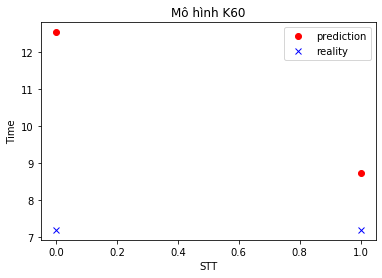

In [0]:
model = keras.models.load_model('/content/driver/My Drive/Deep-Learning/LSTM_Software/Code/Use Data_K59/XTAC_DOAN_TOTALAC_XTAT_DOAN_TOTALAT/3_1_at.h5')
path_test = '/content/driver/My Drive/Deep-Learning/LSTM_Software/data/k59/datacsv/test_k59/dataH.csv'

test = pd.read_csv(path_test)
ip_test_xt = test['XT'].values 
ip_test_at = test['AT'].values
test_output = test['TOTAL_AT'].values

# scaler = MinMaxScaler(feature_range=(0, 1))
# print(test_output)
# ip_test_xt = scaler.fit_transform(ip_test_xt.reshape(-1,1))
# ip_test_ac = scaler.fit_transform(ip_test_ac.reshape(-1,1))
# test_output = scaler.fit_transform(test_output.reshape(-1,1))
x_input=[]
y_output =[]

data_input2D = []
data_output1D = []
steps = 3

for i in range(0,len(ip_test_xt)-steps+1):
  temp_3D = []
  for k in range(i, i+steps):
    temp_2D = []
    temp_2D.append(ip_test_xt[k])
    temp_2D.append(ip_test_at[k])
    
    temp_3D.append(temp_2D)

  data_input2D.append(temp_3D)
x_input.append(data_input2D)


x_input = np.concatenate( x_input, axis=0 )


x_test = x_input.reshape(-1,3,2)

result = model.predict(x_test)

# result = scaler.inverse_transform(result)


plt.plot(result,'o', color='r')
plt.plot(test_output[1:3],'x', color='b')
plt.title("Mô hình K60")
plt.xlabel("STT")
plt.ylabel("Time")
# mplcursors.cursor(hover=True)
print("actually: ",test_output)
print("model: ", result)
plt.legend(('prediction', 'reality'),loc='upper right')
# mplcursors.cursor(hover=True)

plt.show()